<a href="https://colab.research.google.com/github/Karomsky/Karomsky.github.io/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#Loading the dataset

In [0]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train = y_train.shape[0]
n_test = y_test.shape[0]
n_categories = 10

4423680/4422102 [==============================] - 4s 1us/step


In [0]:
#Take a look at the dataset

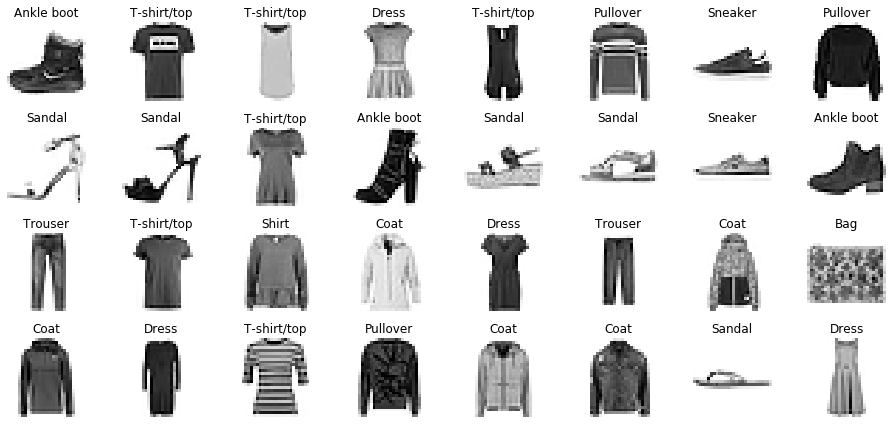

In [0]:
categories = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover',3:'Dress', 4:'Coat',
             5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(13,6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap='Greys')
    ax.set_title(categories[y_train[i]])
    ax.axis('off')
    
    fig.tight_layout()
    

In [0]:
#Processing the data

In [0]:
## Reshaping and rescaling images:
X_train = X_train.reshape(n_train, 28, 28, 1)/255.
X_test = X_test.reshape(n_test, 28, 28, 1)/255.

#Getting validation and test sets
X_val = X_test[:1000]
X_test = X_test[1000:]

y_val = y_test[:1000]
y_test = y_test[1000:]


ValueError: cannot reshape array of size 7056000 into shape (10000,28,28,1)

In [0]:
BATCH_SIZE = 128

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.batch(BATCH_SIZE)
iterator = train_dataset.make_initializable_iterator()
next_element = iterator.get_next()


W0917 13:28:07.257787  2236 deprecation.py:323] From <ipython-input-15-03ff6f905f06>:6: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


In [0]:
def cnn(inputs):
    ##convolution +max_pooling 1
    conv1 = tf.layers.conv2d(inputs, filters=32, kernel_size=3,
                            strides=1, padding='same', activation=tf.nn.relu)
    max_pooling1 = tf.layers.max_pooling2d(conv1, pool_size=2, strides=2, padding='same')
    
    ##convolution +max_pooling 2
    conv2 = tf.layers.conv2d(max_pooling1, filters=64, kernel_size=3,
                            strides=1, padding='same', activation=tf.nn.relu)
    max_pooling2 = tf.layers.max_pooling2d(conv2, pool_size=2, strides=2, padding='same')
    
    #Flatten + dense
    flatten = tf.layers.flatten(max_pooling2)
    dense = tf.lyers.dense(flatten, units=128, activation = tf.nn.relu)
    
    ##Output
    logits = tf.layers.dense(dense, units=n_categories)
    return logits